# Trial Class AI - Haltev

---

Github : https://github.com/vnymyz/Trial-Class-AI-House-Prediction-With-Linear-Regression

Semua Kodingan dan Dataset ada disini ya.

## A. Memahami Dunia data dan AI

### 1. Apa itu Data Analyst ?

Orang yang:

- Mengolah data

- Mencari insight

- Membantu bisnis ambil keputusan

` Data Analyst itu seperti detektif dia cari petunjuk dari data`

### 2. Apa itu Machine Learning ?

Algoritma yang:

- Bagaimana dia Belajar dari data

- Sistem yang belajar dari data untuk membuat prediksi.

Contoh:

- Prediksi harga rumah

- Prediksi gaji

- Rekomendasi produk

### 3. Apa itu AI ?

Sistem yang bisa:

- Belajar

- Mengambil keputusan

- Meniru kecerdasan manusia

`Machine Learning adalah bagian dari AI.`

### 4. Workflow Project AI atau Machine Learning

 1. Kumpulkan data

 2. Pahami data

 3. Bersihkan data

 4. Analisis & visualisasi

 5. Bangun model

 6. Evaluasi model

 7. Gunakan model



**Simple nya :**

- Bahan mentah = data

- Cuci & potong = cleaning

- Cicip rasa = EDA

- Masak = training model

- Tes rasa = evaluasi

- Sajikan = deploy (Streamlit)

---

## B. Implementasi ( Prediksi Harga Rumah )

### Workflow

1. Business Understanding

2. Data Understanding

3. Data Cleaning / Preparation

4. Exploratory Data Analysis (EDA)

5. Feature Engineering

6. Model Selection & Training

7. Evaluation

8. Deployment

### 1. Business Understanding

Kita ingin memprediksi harga rumah berdasarkan karakteristik rumah.

Kenapa ini penting?

- Agen properti bisa menentukan harga jual yang wajar.

- Investor bisa memperkirakan potensi keuntungan.

- Pembeli bisa tahu apakah harga rumah masuk akal.

### 2. DATA UNDERSTANDING

Load Dataset :

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

df = pd.read_csv("data.csv")
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Penjelasan :

- Setiap baris = 1 rumah

- Kolom price = harga rumah (yang mau kita prediksi)

Melihat Struktur Data :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Lihat:

- Apakah ada data kosong?

- Tipe datanya angka atau teks?

Statistik Deskriptif :

In [4]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


Cek apakah ada nilai yang kosong :

In [5]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

### 3. DATA CLEANING / PREPARATION

Drop kolom yang tidak relevan.

In [6]:
df = df.drop(["date", "street", "city", "statezip", "country"], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 467.3 KB


Nge Handle data yang kosong :

In [8]:
df = df.dropna()

### 4. EXPLORATORY DATA ANALYSIS (EDA)

Tujuan nya untuk Mencari pola sebelum membuat model.

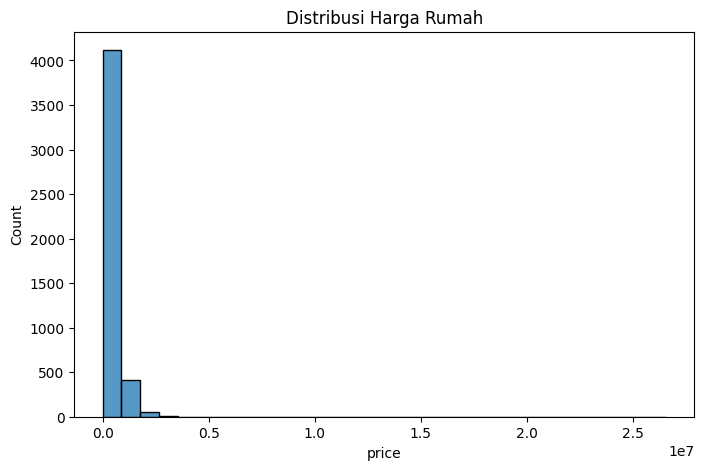

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(df["price"], bins=30)
plt.title("Distribusi Harga Rumah")
plt.show()

Banyak rumah harga menengah.
Sedikit rumah super mahal.

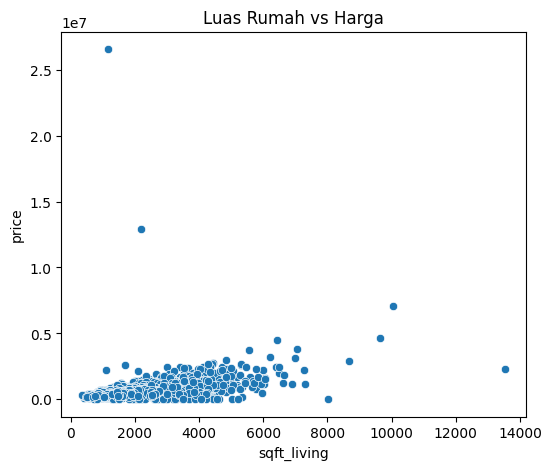

In [10]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=df["sqft_living"], y=df["price"])
plt.title("Luas Rumah vs Harga")
plt.show()

Semakin luas → harga makin tinggi.

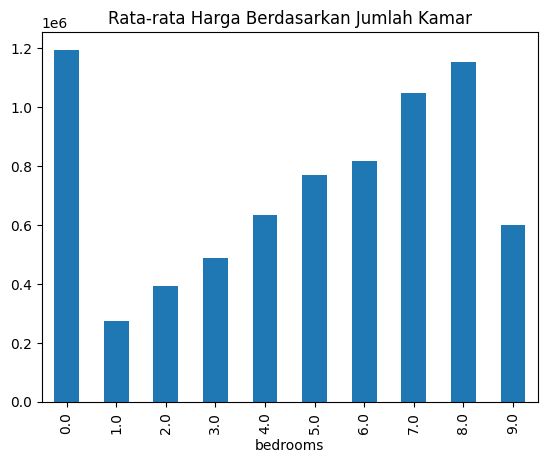

In [11]:
df.groupby("bedrooms")["price"].mean().plot(kind="bar")
plt.title("Rata-rata Harga Berdasarkan Jumlah Kamar")
plt.show()

Korelasi atau heatmap :

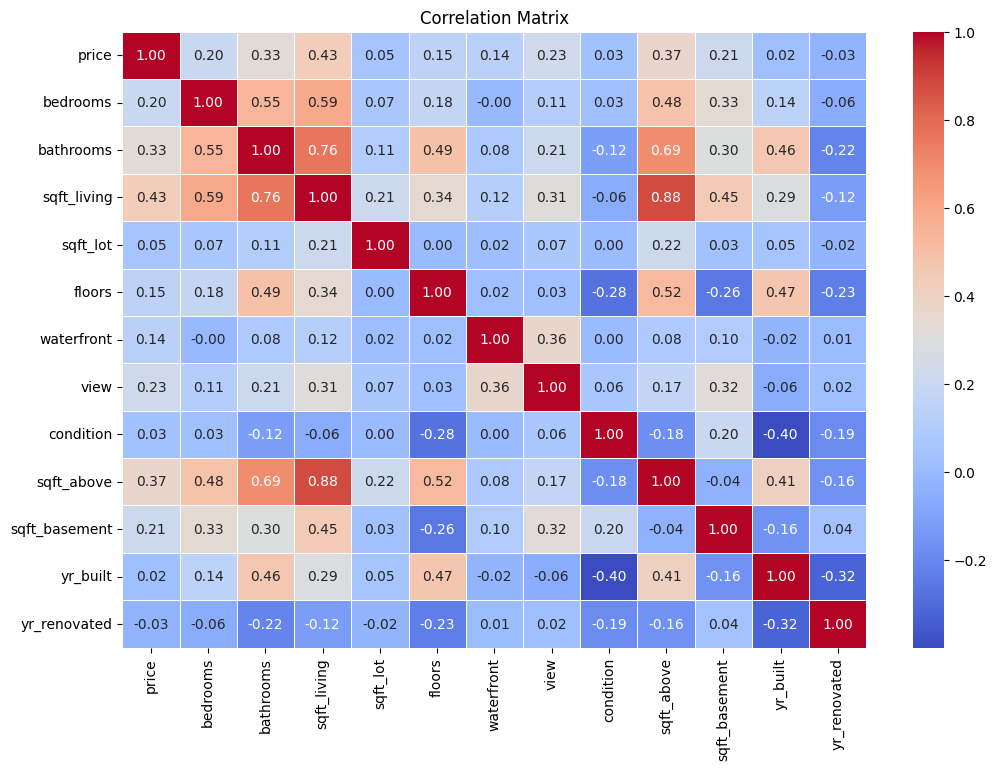

In [12]:
plt.figure(figsize=(12,8))
corr = df.corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Correlation Matrix")
plt.show()

In [13]:
corr = df.corr()["price"].sort_values(ascending=False)
print(corr)

price            1.000000
sqft_living      0.430410
sqft_above       0.367570
bathrooms        0.327110
view             0.228504
sqft_basement    0.210427
bedrooms         0.200336
floors           0.151461
waterfront       0.135648
sqft_lot         0.050451
condition        0.034915
yr_built         0.021857
yr_renovated    -0.028774
Name: price, dtype: float64


Lalu pilih 4–5 fitur dengan korelasi paling tinggi selain price.

### 5. FEATURE ENGINEERING

Feature Engineering adalah memilih atau memodifikasi fitur agar model lebih baik.

Untuk trial, kita pilih fitur paling penting.

In [14]:
# Hapus harga 0 dulu
df = df[df["price"] > 0]

# Feature
X = df[[
    "sqft_living",
    "sqft_above",
    "sqft_basement",
    "bedrooms",
    "bathrooms",
    "floors",
    "view",
    "condition",
    "yr_built",
    "waterfront"
]]

# Target log
y = np.log(df["price"])

### 6. Model Training

#### Train Test Split

Kenapa perlu split?

Supaya model tidak menghafal data.
Kita uji performa model dengan data yang belum pernah dilihat.

Scaling :

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train Model :

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

Penjelasan :

- 80% untuk belajar

- 20% untuk ujian

### Pilih Model → Linear Regression

In [17]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Sekarang model sudah belajar dari data.

### 7. Evaluation Model

Lakukan Prediksi :

In [18]:
y_pred = model.predict(X_test)

hasil = pd.DataFrame({
    "Harga Asli": y_test.values,
    "Harga Prediksi": y_pred
})

hasil.head(10)

,Harga Asli,Harga Prediksi
0,14.018451,14.136036
1,13.115846,13.067554
2,13.325304,13.227387
3,12.487485,12.435959
4,13.329378,13.010214
5,12.976181,13.141469
6,12.628067,12.461161
7,12.911642,12.417876
8,12.762827,12.977984
9,13.639966,13.499465


Hitung Evaluasi :

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Model menjelaskan sekitar {r2*100:.2f}% pola harga rumah.")
print(f"Rata-rata kesalahan prediksi sekitar {mae:,.0f} dollar.")

Model menjelaskan sekitar 48.77% pola harga rumah.
Rata-rata kesalahan prediksi sekitar 0 dollar.


In [20]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R2 Score:", r2)
print("MAE:", mae)

R2 Score: 0.4877308545912892
MAE: 0.2947724624515891


R2 Score :

- Mendekati 1 → model bagus

- Mendekati 0 → model kurang baik

MAE :

- Rata-rata selisih harga prediksi dengan harga asli

jadi kalau misal bisa gk si modelnya jadi lebih akurat ? 

Bisa. Dengan model seperti Random Forest, Gradient Boosting (XGBoost), atau LightGBM. Tapi semakin kompleks model, semakin perlu tuning dan komputasi lebih besar.

### Simpan Model yang barusan kita buat

In [21]:
import pickle

pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(poly, open("poly.pkl", "wb"))


kalau mau coba jalanin streamlit di google colab bisa :

- !pip install streamlit

- !pip install pyngrok

In [22]:
!pip install streamlit


[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
!pip install pyngrok


[notice] A new release of pip is available: 24.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Jalankan Streamlit

In [24]:
%%writefile app.py
import streamlit as st
import pickle
import numpy as np

# Load semua object
model = pickle.load(open("model.pkl", "rb"))
scaler = pickle.load(open("scaler.pkl", "rb"))
poly = pickle.load(open("poly.pkl", "rb"))

st.title("Prediksi Harga Rumah")

sqft_living = st.number_input("Luas Rumah (sqft)", min_value=0.0)
sqft_above = st.number_input("Luas Atas", min_value=0.0)
sqft_basement = st.number_input("Luas Basement", min_value=0.0)
bedrooms = st.number_input("Jumlah Kamar", min_value=0.0)
bathrooms = st.number_input("Jumlah Kamar Mandi", min_value=0.0)
floors = st.number_input("Jumlah Lantai", min_value=0.0)
view = st.number_input("View (0-4)", min_value=0.0)
condition = st.number_input("Condition (1-5)", min_value=0.0)
yr_built = st.number_input("Tahun Dibangun", min_value=1900.0)
waterfront = st.number_input("Waterfront (0/1)", min_value=0.0)

if st.button("Prediksi Harga"):

    data = np.array([[
        sqft_living,
        sqft_above,
        sqft_basement,
        bedrooms,
        bathrooms,
        floors,
        view,
        condition,
        yr_built,
        waterfront
    ]])

    # Transform sama seperti training
    data_scaled = scaler.transform(data)
    data_poly = poly.transform(data_scaled)

    log_prediction = model.predict(data_poly)
    prediction = np.exp(log_prediction)  # karena kamu pakai log target

    st.success(f"Perkiraan Harga Rumah: ${prediction[0]:,.0f}")

Overwriting app.py


Menjalankan streamlit dan Ngrok

In [ ]:
from pyngrok import ngrok
import subprocess

# Jalankan streamlit di background
get_ipython().system_raw('streamlit run app.py --server.port 8501 &')

# Buat tunnel publik
public_url = ngrok.connect(8501)
print(public_url)


Coba isi ini:

- Luas Rumah (sqft) → 2000

- Luas Atas → 1800

- Luas Basement → 200

- Jumlah Kamar → 3

- Jumlah Kamar Mandi → 2

- Jumlah Lantai → 1

- View (0-4) → 1

- Condition (1-5) → 3

- Tahun Dibangun → 1995

- Waterfront (0/1) → 0

Ini harusnya harga menengah.